In [26]:
from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

simplefilter("ignore")  # ignore warnings to clean up output cells

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'


# Load Tunnel Traffic dataset
stock = pd.read_csv("../ALBRK.csv", parse_dates=["Date"])
stock = stock.tail(365)

# Create a time series in Pandas by setting the index to a date
# column. We parsed "Day" as a date type by using `parse_dates` when
# loading the data.
stock = stock.set_index("Date")

# By default, Pandas creates a `DatetimeIndex` with dtype `Timestamp`
# (equivalent to `np.datetime64`, representing a time series as a
# sequence of measurements taken at single moments. A `PeriodIndex`,
# on the other hand, represents a time series as a sequence of
# quantities accumulated over periods of time. Periods are often
# easier to work with, so that's what we'll use in this course.
stock = stock.to_period("D")

stock.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-27,1.82,1.84,1.80,1.81,1.81,7719889
2021-12-28,1.82,1.83,1.74,1.74,1.74,6117410
2021-12-29,1.75,1.80,1.71,1.78,1.78,8466389
2021-12-30,1.79,1.80,1.72,1.72,1.72,8580072
2021-12-31,1.73,1.76,1.72,1.74,1.74,2673550


In [27]:
df = stock.copy()

df['Time'] = np.arange(len(stock.index))

df.head()

,Open,High,Low,Close,Adj Close,Volume,Time
Date,,,,,,,
2021-12-27,1.82,1.84,1.80,1.81,1.81,7719889,0
2021-12-28,1.82,1.83,1.74,1.74,1.74,6117410,1
2021-12-29,1.75,1.80,1.71,1.78,1.78,8466389,2
2021-12-30,1.79,1.80,1.72,1.72,1.72,8580072,3
2021-12-31,1.73,1.76,1.72,1.74,1.74,2673550,4


In [28]:
from sklearn.linear_model import LinearRegression

# Training data
X = df.loc[:, ['Time']]  # features
y = df.loc[:, 'Close']  # target

# Train the model
model = LinearRegression()
model.fit(X, y)

# Store the fitted values as a time series with the same time index as
# the training data
y_pred = pd.Series(model.predict(X), index=X.index)
y_pred

Date
2021-12-27    1.336172
2021-12-28    1.341054
2021-12-29    1.345937
2021-12-30    1.350820
2021-12-31    1.355703
                ...   
2023-06-05    3.094018
2023-06-06    3.098901
2023-06-07    3.103784
2023-06-08    3.108667
2023-06-09    3.113549
Freq: D, Length: 365, dtype: float64

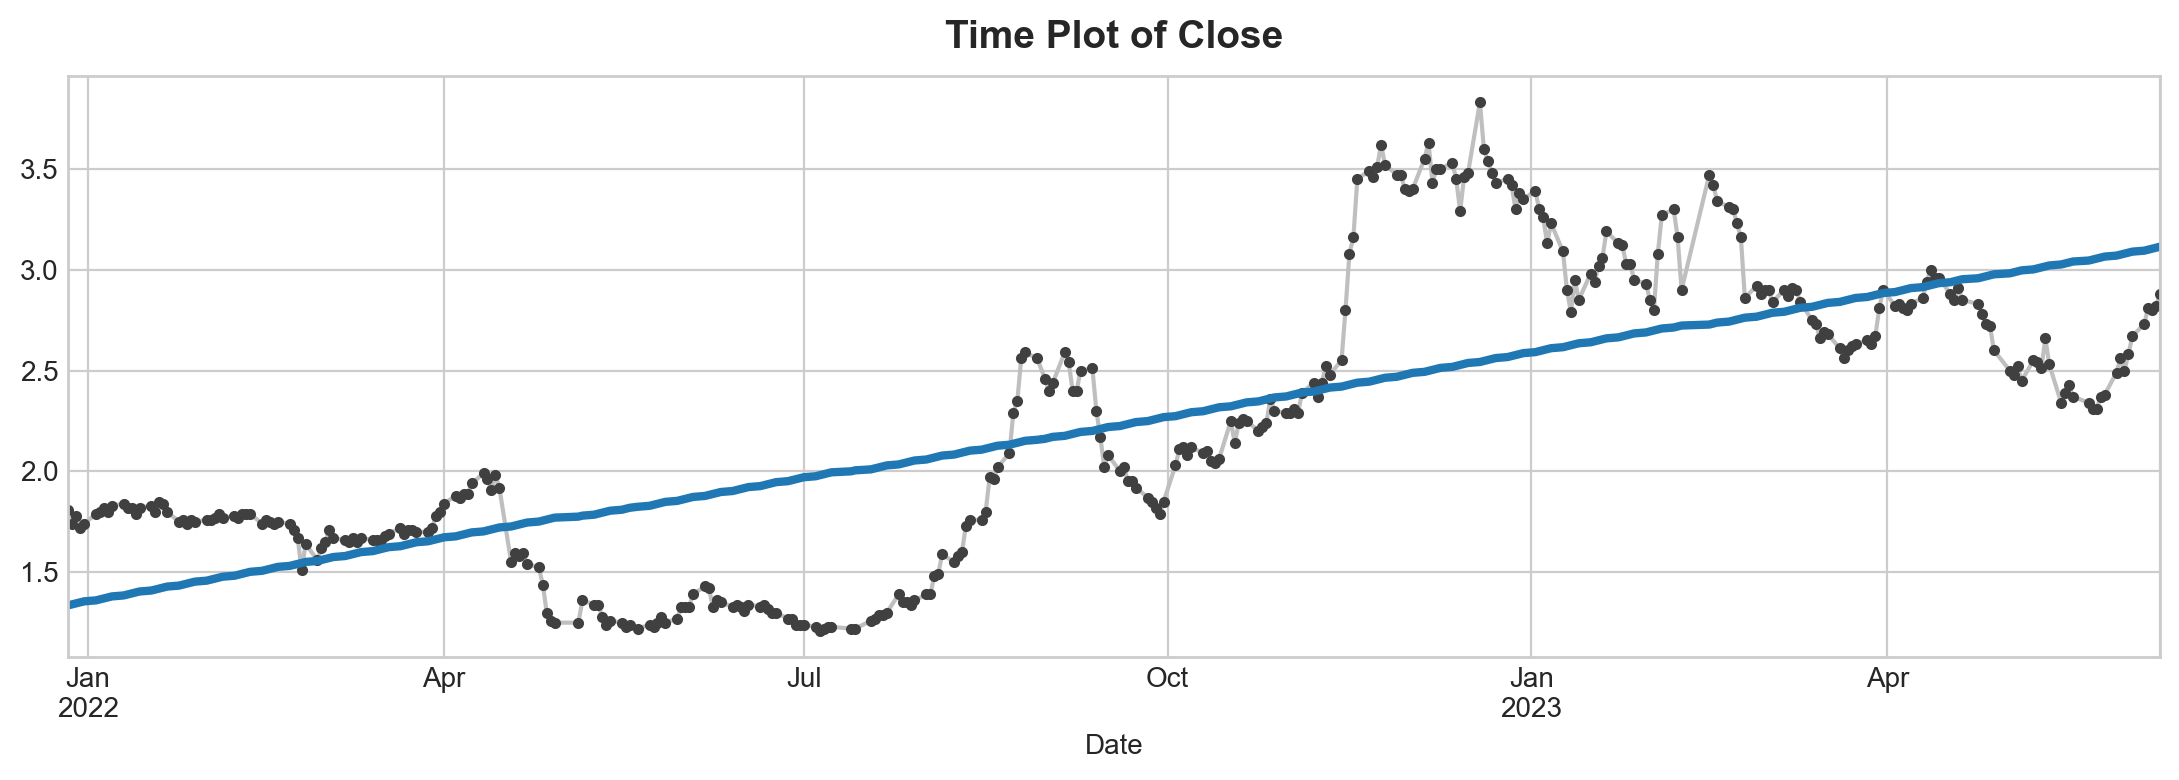

In [29]:
ax = y.plot(**plot_params)
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Close');

In [30]:
df['Lag_1'] = df['Close'].shift(1)
df.head()

,Open,High,Low,Close,Adj Close,Volume,Time,Lag_1
Date,,,,,,,,
2021-12-27,1.82,1.84,1.80,1.81,1.81,7719889,0,NaN
2021-12-28,1.82,1.83,1.74,1.74,1.74,6117410,1,1.81
2021-12-29,1.75,1.80,1.71,1.78,1.78,8466389,2,1.74
2021-12-30,1.79,1.80,1.72,1.72,1.72,8580072,3,1.78
2021-12-31,1.73,1.76,1.72,1.74,1.74,2673550,4,1.72


In [31]:
from sklearn.linear_model import LinearRegression

X = df.loc[:, ['Lag_1']]
X.dropna(inplace=True)  # drop missing values in the feature set
y = df.loc[:, 'Close']  # create the target
y, X = y.align(X, join='inner')  # drop corresponding values in target

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)
y_pred

Date
2021-12-28    1.815642
2021-12-29    1.746100
2021-12-30    1.785838
2021-12-31    1.726231
2022-01-03    1.746100
                ...   
2023-06-05    2.670016
2023-06-06    2.729623
2023-06-07    2.809099
2023-06-08    2.799165
2023-06-09    2.819034
Freq: D, Length: 364, dtype: float64

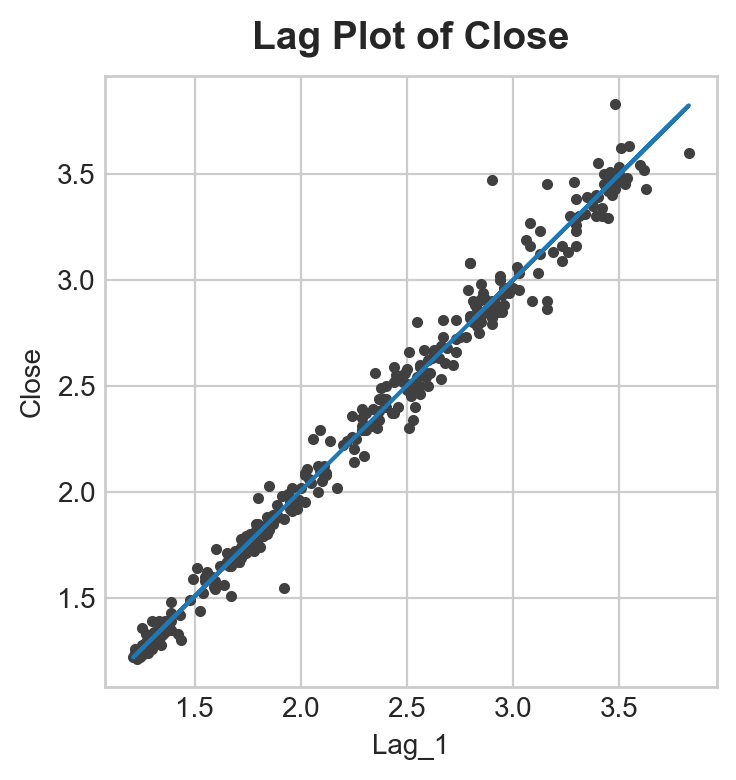

In [32]:
fig, ax = plt.subplots()
ax.plot(X['Lag_1'], y, '.', color='0.25')
ax.plot(X['Lag_1'], y_pred)
ax.set_aspect('equal')
ax.set_ylabel('Close')
ax.set_xlabel('Lag_1')
ax.set_title('Lag Plot of Close');

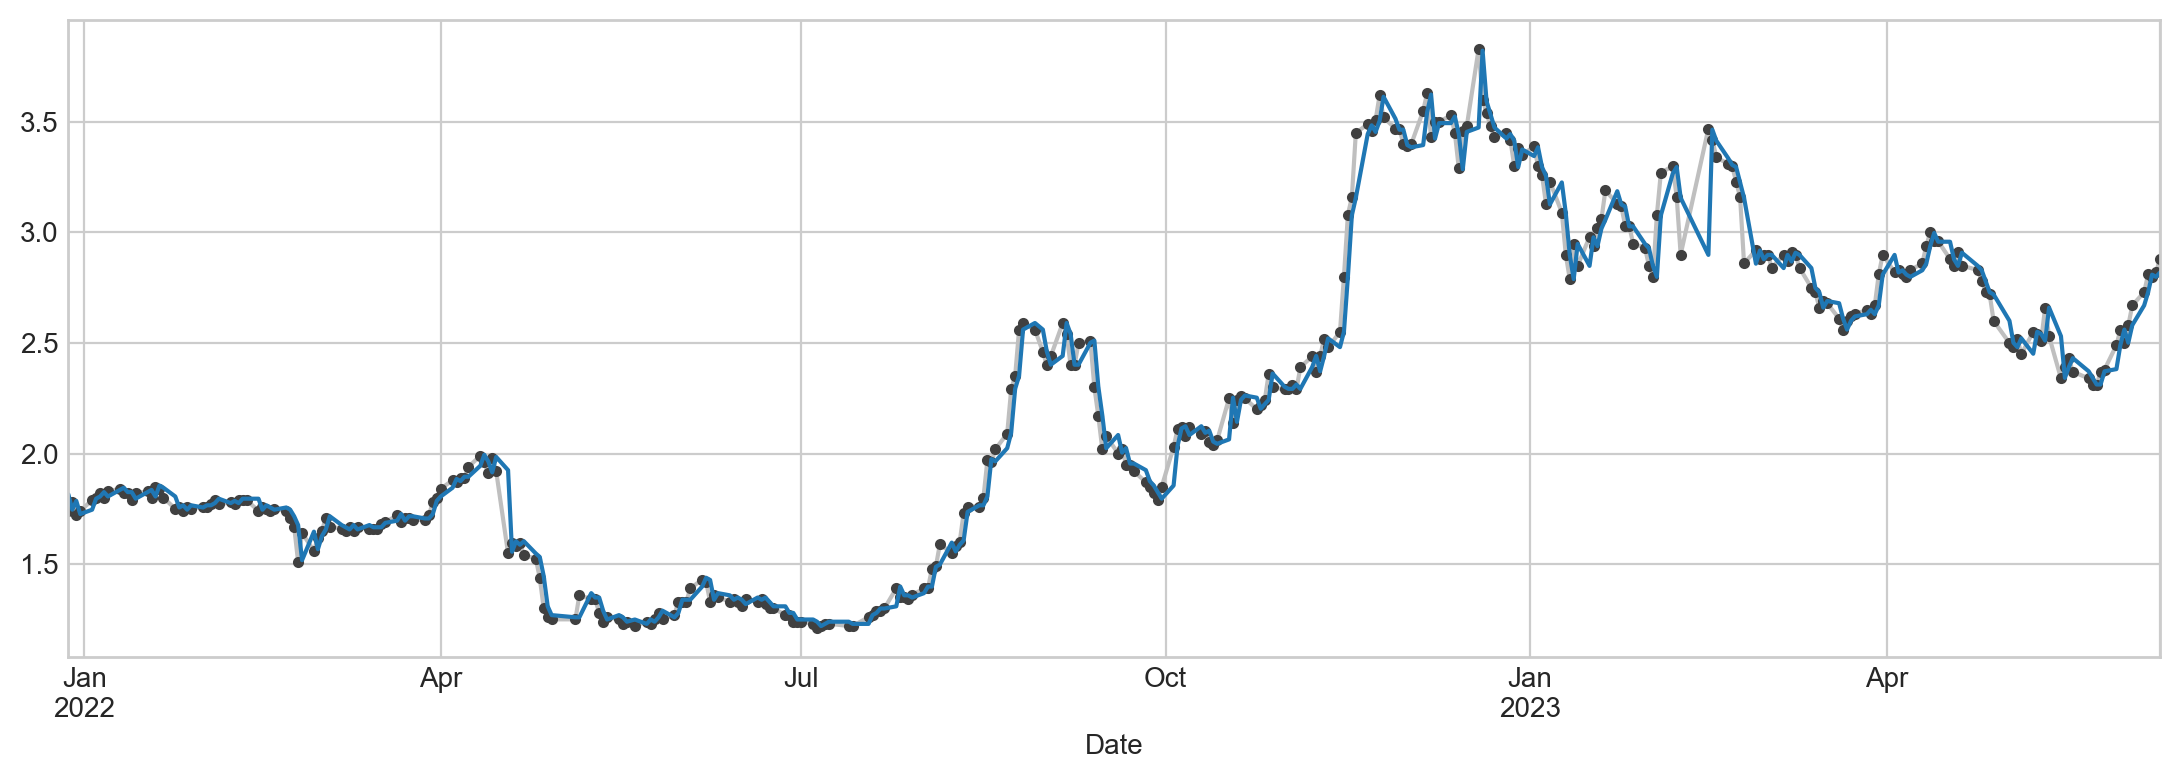

In [33]:
ax = y.plot(**plot_params)
ax = y_pred.plot()